In [1]:
import numpy as np
import pandas as pd

In [11]:
crime_data = pd.read_excel('C:/Users/michelj8/Documents/GitHub/Integer time series/813_crimes.xlsx')

In [12]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190505845,2019-02-11,2019-02-05,730,5,Harbor,563,2,813,CHILD ANNOYING (17YRS & UNDER),...,IC,Invest Cont,813,NaN,NaN,NaN,13TH ST,CABRILLO,33.7324,-118.2946
1,190212708,2019-06-07,2019-06-03,320,2,Rampart,275,2,813,CHILD ANNOYING (17YRS & UNDER),...,IC,Invest Cont,813,NaN,NaN,NaN,1600 W 11TH ST,NaN,34.0506,-118.2769
2,191715992,2019-09-26,2019-09-25,1730,17,Devonshire,1777,2,813,CHILD ANNOYING (17YRS & UNDER),...,IC,Invest Cont,813,NaN,NaN,NaN,9800 WOODLEY AV,NaN,34.2422,-118.4897
3,191716137,2019-09-27,2019-09-26,1340,17,Devonshire,1737,2,813,CHILD ANNOYING (17YRS & UNDER),...,AO,Adult Other,813,NaN,NaN,NaN,16500 CHATSWORTH ST,NaN,34.2703,-118.4959
4,191914524,2019-08-06,2019-08-06,1200,19,Mission,1935,2,813,CHILD ANNOYING (17YRS & UNDER),...,IC,Invest Cont,813,NaN,NaN,NaN,15100 S BRAND BL,NaN,34.2752,-118.4603


In [61]:
ts_df = crime_data.groupby(['DATE OCC']).count()[['DR_NO']].reset_index()
ts_df['year-month'] = ts_df['DATE OCC'].apply(lambda s: str(s)[0:7])

ts_df = ts_df.groupby('year-month').sum()
ts_df.columns = ['Y']

In [62]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_df, (1,0)).fit()
model.params

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      42.913003
ar.L1.Y     0.424788
dtype: float64

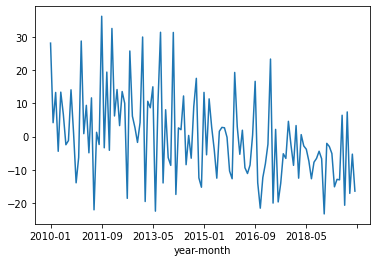

In [63]:
model.resid.plot()

In [65]:
ts_df['delta'] = ts_df['Y'].diff(1)
ts_df['abs_delta'] = np.abs(ts_df['delta'])

const         -0.366380
ar.L1.delta   -0.461628
dtype: float64


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


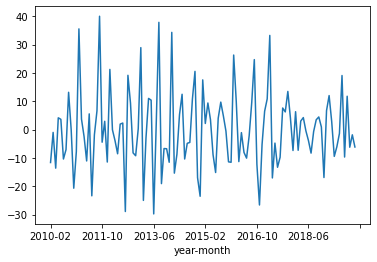

In [73]:
model = ARMA(ts_df['delta'].dropna(), (1,0)).fit()
print(model.params)
model.resid.plot()

const              11.875855
ar.L1.abs_delta     0.219364
dtype: float64


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


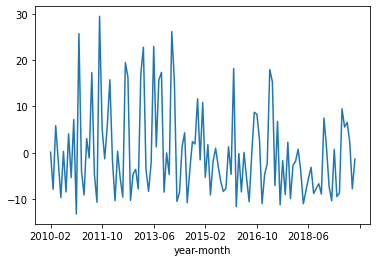

In [74]:
model = ARMA(ts_df['abs_delta'].dropna(), (1,0)).fit()
print(model.params)
model.resid.plot()

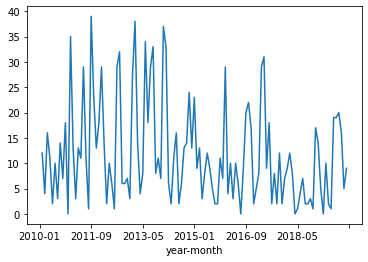

In [75]:
ts_df['abs_delta'].plot()

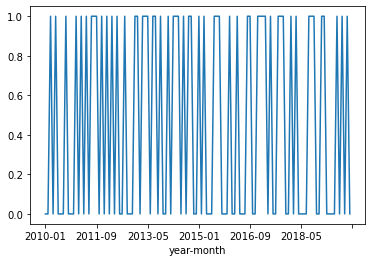

In [79]:
ts_df['sign_dif'] = 1*(ts_df['delta'] > 0)
ts_df['sign_dif'].plot()

In [80]:
model = ARMA(ts_df['sign_dif'].dropna(), (1,0)).fit()
print(model.params)

const             0.468042
ar.L1.sign_dif   -0.214039
dtype: float64


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


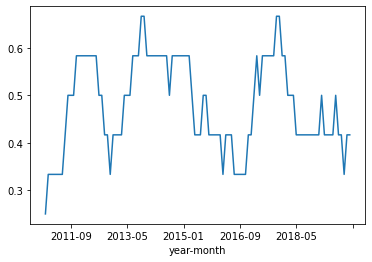

In [86]:
ts_df['sign_dif'].rolling(window = 12).mean().plot()